# Линейная регрессия
__Суммарное количество баллов: 10__


In [29]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import pandas

In [4]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [5]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [6]:
def mse(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [7]:
class NormalLR:
    def __init__(self):
        self.w = []

    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        new_X = np.dot(X.transpose(),X)
        self.w = np.linalg.inv(new_X)
        self.w = np.dot(self.w, X.transpose())
        self.w = self.w.dot(y)
    
    def predict(self, X):
        new_X = np.insert(X, 0, 1, axis=1)
        return new_X.dot(self.w)

In [83]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [84]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.008614818709075924


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [23]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.w = []
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        self.w = [1]*(len(X[0]) + 1)
        X = np.insert(X, 0, 1, axis=1)
        new_X = np.dot(X.transpose(),X)
        for i in range(self.iterations):
            h = np.dot(new_X, self.w) - np.dot(X.transpose(),y)
            self.w = self.w - self.alpha * (h +  self.l * np.max(self.w))


    def predict(self, X):
        new_X = np.insert(X, 0, 1, axis=1)
        return new_X.dot(self.w)

In [8]:
def build_plot(X_train, y_train, X_test, y_test):
    xx = [0]*100
    yy = [0]*100
    for i in range(100):
        xx[i] = i
        regr = GradientLR(0.001, iterations=100, l=i)
        regr.fit(X_train, y_train)
        er= mse(y_test, regr.predict(X_test))
        yy[i] = er
    plt.plot(xx, yy)

In [118]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.011040374760898898


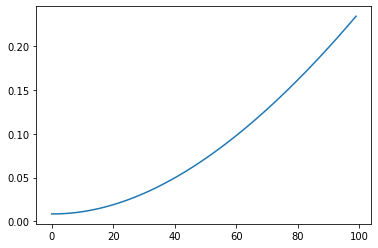

In [124]:
regr = GradientLR(0.001, iterations=100, l=10)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [34]:
X, y = read_data("spam.csv")
transformer = MaxAbsScaler().fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)



In [35]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.18909584599549914


0.2004561532681745


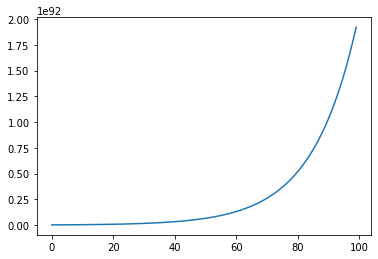

In [36]:
regr = GradientLR(0.0001, iterations=100)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

In [37]:
data = pandas.read_csv('cancer.csv')
data = data.to_numpy()
row = len(data)
X = [0]*row
y = [0]*row
for i in range(row):
    X[i] = data[i][1:]
    if data[i][0] == 'M':
        y[i] = 1
    else:
        y[i] = 0

In [38]:
transformer = MaxAbsScaler().fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [40]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.05986875983435757


0.16230027170317568
0.14841629003961596


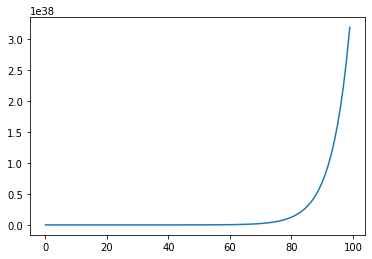

In [43]:
regr = GradientLR(0.0001, iterations=100)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.0001, iterations=100, l=5)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)